# Figures

Creating various figures for the paper using data from other files.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
pid_results = pd.read_csv('./data/pid_wind.csv')
pid_leashless_results = pd.read_csv('./data/pid_noleash_wind.csv')
full_agent_results = pd.read_csv('./data/naive.csv')
oracle_agent_results = pd.read_csv('./data/oracle.csv')
lstm_agent_results = pd.read_csv('./data/lstm_wind.csv')

In [3]:
def get_polar_data(results, speed): # converts data into format needed for polar plots
    subset = results[results['Wind'].str.contains(str(speed))]
    subset['theta'] = np.array([1.5708, 4.71239, 0, 3.14159, 2.35619, 3.92699, 0.785398, 5.49779])
    subset = subset.sort_values('theta')
    first_row = subset.iloc[0:1, :]
    subset = pd.concat([subset, first_row], ignore_index=True)

    return subset['theta'].to_numpy(), subset['Mean TTE'].to_numpy()

/tmp/ipykernel_29615/225335385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['theta'] = np.array([1.5708, 4.71239, 0, 3.14159, 2.35619, 3.92699, 0.785398, 5.49779])
/tmp/ipykernel_29615/225335385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['theta'] = np.array([1.5708, 4.71239, 0, 3.14159, 2.35619, 3.92699, 0.785398, 5.49779])
/tmp/ipykernel_29615/225335385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

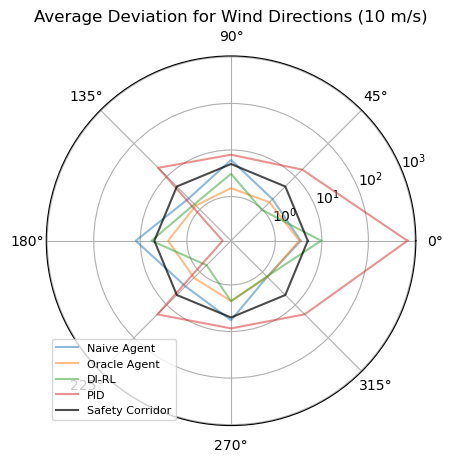

In [4]:
pid_theta, pid_r = get_polar_data(pid_results, 10)
full_agent_theta, full_agent_r = get_polar_data(full_agent_results, 10)
oracle_agent_theta, oracle_agent_r = get_polar_data(oracle_agent_results, 10)
lstm_theta, lstm_r = get_polar_data(lstm_agent_results, 10)
noleash_theta, noleash_r = get_polar_data(pid_leashless_results, 10)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rscale('log')
# ax.plot(pid_theta, pid_r, label='PID Safety Leash', alpha=0.5)
ax.plot(full_agent_theta, full_agent_r, label='Naive Agent', alpha=0.5)
ax.plot(oracle_agent_theta, oracle_agent_r, label='Oracle Agent', alpha=0.5)
ax.plot(lstm_theta, lstm_r, label='DI-RL', alpha=0.5)
ax.plot(noleash_theta, noleash_r, label='PID', alpha=0.5)
ax.plot(pid_theta, [5]*len(lstm_r), label='Safety Corridor', color='black', alpha=0.7)

ax.set_title("Average Deviation for Wind Directions (10 m/s)")
ax.legend(loc='lower left', prop={'size':8})

# plt.savefig('./figures/polar10m')
plt.show()

/tmp/ipykernel_29615/225335385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['theta'] = np.array([1.5708, 4.71239, 0, 3.14159, 2.35619, 3.92699, 0.785398, 5.49779])
/tmp/ipykernel_29615/225335385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['theta'] = np.array([1.5708, 4.71239, 0, 3.14159, 2.35619, 3.92699, 0.785398, 5.49779])
/tmp/ipykernel_29615/225335385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

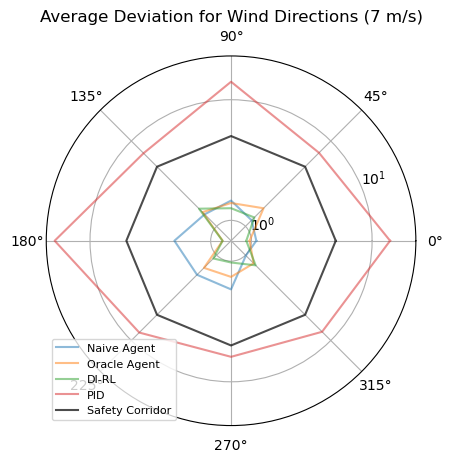

In [5]:
pid_theta, pid_r = get_polar_data(pid_results, 7)
full_agent_theta, full_agent_r = get_polar_data(full_agent_results, 7)
oracle_agent_theta, oracle_agent_r = get_polar_data(oracle_agent_results, 7)
lstm_theta, lstm_r = get_polar_data(lstm_agent_results, 7)
noleash_theta, noleash_r = get_polar_data(pid_leashless_results, 7)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rscale('log')
# ax.plot(pid_theta, pid_r, label='PID Safety Leash', alpha=0.5)
ax.plot(full_agent_theta, full_agent_r, label='Naive Agent', alpha=0.5)
ax.plot(oracle_agent_theta, oracle_agent_r, label='Oracle Agent', alpha=0.5)
ax.plot(lstm_theta, lstm_r, label='DI-RL', alpha=0.5)
ax.plot(noleash_theta, noleash_r, label='PID', alpha=0.5)
ax.plot(pid_theta, [5]*len(lstm_r), label='Safety Corridor', color='black', alpha=0.7)

ax.set_title("Average Deviation for Wind Directions (7 m/s)")
ax.legend(loc='lower left', prop={'size':8})

# plt.savefig('./figures/polar10m')
plt.show()

/tmp/ipykernel_29615/225335385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['theta'] = np.array([1.5708, 4.71239, 0, 3.14159, 2.35619, 3.92699, 0.785398, 5.49779])
/tmp/ipykernel_29615/225335385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['theta'] = np.array([1.5708, 4.71239, 0, 3.14159, 2.35619, 3.92699, 0.785398, 5.49779])
/tmp/ipykernel_29615/225335385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

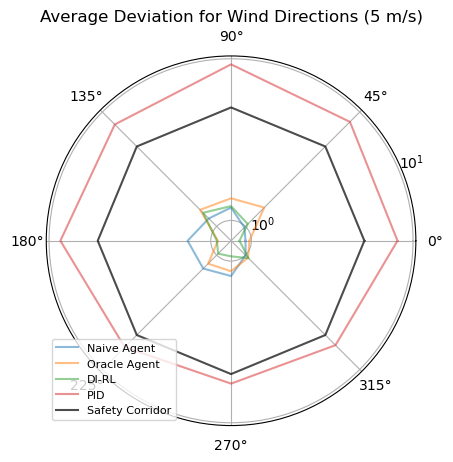

In [6]:
pid_theta, pid_r = get_polar_data(pid_results, 5)
full_agent_theta, full_agent_r = get_polar_data(full_agent_results, 5)
oracle_agent_theta, oracle_agent_r = get_polar_data(oracle_agent_results, 5)
lstm_theta, lstm_r = get_polar_data(lstm_agent_results, 5)
noleash_theta, noleash_r = get_polar_data(pid_leashless_results, 5)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_rscale('log')
# ax.plot(pid_theta, pid_r, label='PID Safety Leash', alpha=0.5)
ax.plot(full_agent_theta, full_agent_r, label='Naive Agent', alpha=0.5)
ax.plot(oracle_agent_theta, oracle_agent_r, label='Oracle Agent', alpha=0.5)
ax.plot(lstm_theta, lstm_r, label='DI-RL', alpha=0.5)
ax.plot(noleash_theta, noleash_r, label='PID', alpha=0.5)
ax.plot(pid_theta, [5]*len(lstm_r), label='Safety Corridor', color='black', alpha=0.7)

ax.set_title("Average Deviation for Wind Directions (5 m/s)")
ax.legend(loc='lower left', prop={'size':8})

# plt.savefig('./figures/polar10m')
plt.show()